### Capstone Project

Author: Peter La

Title: An In-Depth Analysis of Stroke Risk Factors Using Predictive Analytics

Date: October 24, 2025

Author: Peter La

     

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Libraries

In [2]:
import os
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns;

warnings.filterwarnings("ignore")
%matplotlib inline
dpi = 300
sns.set()

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

Import Dataset

In [4]:
df = pd.read_csv(r'/content/drive/MyDrive/capstone_project/stroke_data.csv')
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
1257,47622,Male,78,0,1,Yes,Self-employed,Urban,228.70,34.0,Unknown,0
2708,60056,Male,53,0,0,Yes,Private,Urban,113.21,28.6,smokes,0
225,32729,Female,81,0,0,Yes,Private,Rural,184.40,27.5,never smoked,1
1636,23459,Female,47,0,0,Yes,Private,Rural,75.43,36.4,smokes,0
2558,31600,Female,33,0,0,No,Private,Rural,106.08,32.5,formerly smoked,0
3986,41970,Male,30,0,0,No,Private,Urban,106.03,26.7,Unknown,0
536,44315,Male,18,0,0,No,Self-employed,Rural,182.86,21.0,Unknown,0
4083,41930,Male,15,0,0,No,Private,Rural,144.15,24.1,never smoked,0
1786,66080,Female,32,0,0,No,Private,Urban,114.37,37.8,Unknown,0
2595,41250,Female,54,0,0,Yes,Private,Rural,97.61,32.1,smokes,0


EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4423 entries, 0 to 4422
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4423 non-null   int64  
 1   gender             4423 non-null   object 
 2   age                4423 non-null   int64  
 3   hypertension       4423 non-null   int64  
 4   heart_disease      4423 non-null   int64  
 5   ever_married       4423 non-null   object 
 6   work_type          4423 non-null   object 
 7   residence_type     4423 non-null   object 
 8   avg_glucose_level  4423 non-null   float64
 9   bmi                4423 non-null   float64
 10  smoking_status     4423 non-null   object 
 11  stroke             4423 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 414.8+ KB


In [6]:
df = df.drop('id', axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4423 entries, 0 to 4422
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4423 non-null   object 
 1   age                4423 non-null   int64  
 2   hypertension       4423 non-null   int64  
 3   heart_disease      4423 non-null   int64  
 4   ever_married       4423 non-null   object 
 5   work_type          4423 non-null   object 
 6   residence_type     4423 non-null   object 
 7   avg_glucose_level  4423 non-null   float64
 8   bmi                4423 non-null   float64
 9   smoking_status     4423 non-null   object 
 10  stroke             4423 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 380.2+ KB


In [8]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

In [9]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [10]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000
mean,0.397016,48.878137,0.112593,0.062175,0.758083,1.883111,0.508478,107.972336,29.028126,1.603663,0.055844
std,0.489797,18.707171,0.316131,0.241500,0.428293,0.877964,0.499985,47.266881,9.399514,1.027463,0.229647
min,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,0.000000,0.000000,0.000000
25%,0.000000,34.000000,0.000000,0.000000,1.000000,2.000000,0.000000,77.445000,24.700000,1.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,1.000000,2.000000,1.000000,92.150000,28.700000,2.000000,0.000000
75%,1.000000,63.000000,0.000000,0.000000,1.000000,2.000000,1.000000,115.885000,33.700000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.740000,97.600000,4.000000,1.000000


In [11]:
df.to_csv('/content/drive/MyDrive/capstone_project/prepped_stroke_data.csv', index=False)

In [12]:
path = '/content/drive/MyDrive/capstone_project/'

Plot Visualizations

In [13]:
correlation_matrix = df.corr()
correlation_matrix

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,0.039711,0.035470,0.100984,0.022430,-0.003546,-0.012825,0.070335,-0.016970,-0.011698,0.019979
age,0.039711,1.000000,0.254545,0.269126,0.517097,0.101380,0.018812,0.231026,-0.004637,0.000546,0.251412
hypertension,0.035470,0.254545,1.000000,0.097858,0.112698,0.045799,-0.008902,0.167443,0.033752,0.071973,0.118959
heart_disease,0.100984,0.269126,0.097858,1.000000,0.077676,0.043883,0.002188,0.158621,-0.064280,0.039183,0.129026
ever_married,0.022430,0.517097,0.112698,0.077676,1.000000,0.012587,0.006412,0.122029,0.085075,0.034389,0.075307
work_type,-0.003546,0.101380,0.045799,0.043883,0.012587,1.000000,-0.008303,0.023665,-0.016389,-0.019781,0.031261
residence_type,-0.012825,0.018812,-0.008902,0.002188,0.006412,-0.008303,1.000000,0.000157,-0.005936,0.016447,0.016556
avg_glucose_level,0.070335,0.231026,0.167443,0.158621,0.122029,0.023665,0.000157,1.000000,0.052944,0.040440,0.129297
bmi,-0.016970,-0.004637,0.033752,-0.064280,0.085075,-0.016389,-0.005936,0.052944,1.000000,-0.105580,-0.087201
smoking_status,-0.011698,0.000546,0.071973,0.039183,0.034389,-0.019781,0.016447,0.040440,-0.105580,1.000000,0.045904


In [14]:
plt.style.use('default')

In [15]:
# Create mask for upper right of triangle
mask = np.triu(np.ones_like(correlation_matrix.corr(), dtype=bool))

In [16]:
# Create correlation heatmap for input variables
corr_min = -1
corr_max = 1

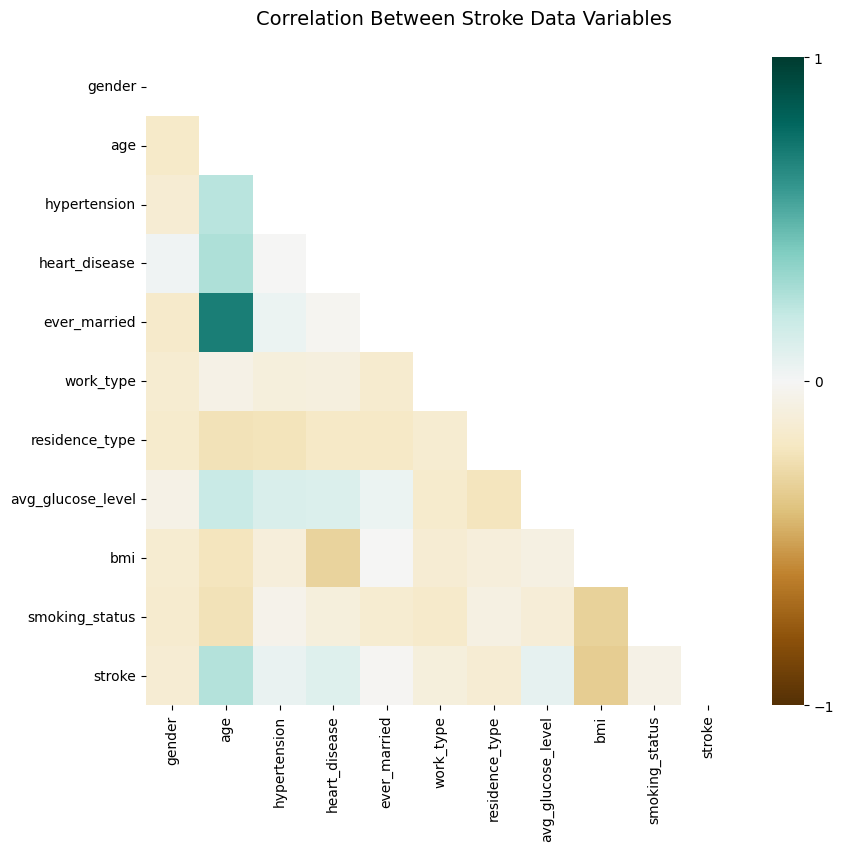

In [17]:
# Plotting

fig, ax = plt.subplots(figsize=(9.5, 8))

ax.grid(False)

sns.heatmap(correlation_matrix.corr(),
            vmin=corr_min,
            vmax=corr_max,
            cmap='BrBG',
            cbar_kws={"ticks": [-1, 0, 1]},
            mask=mask,
            ax=ax)

fig.suptitle('Correlation Between Stroke Data Variables', x=.46, fontsize=14)

plt.subplots_adjust(top=.92)
plt.show()

In [18]:
plot1_filename = 'heatmap.png'
fig.savefig(path + plot1_filename, dpi=dpi)

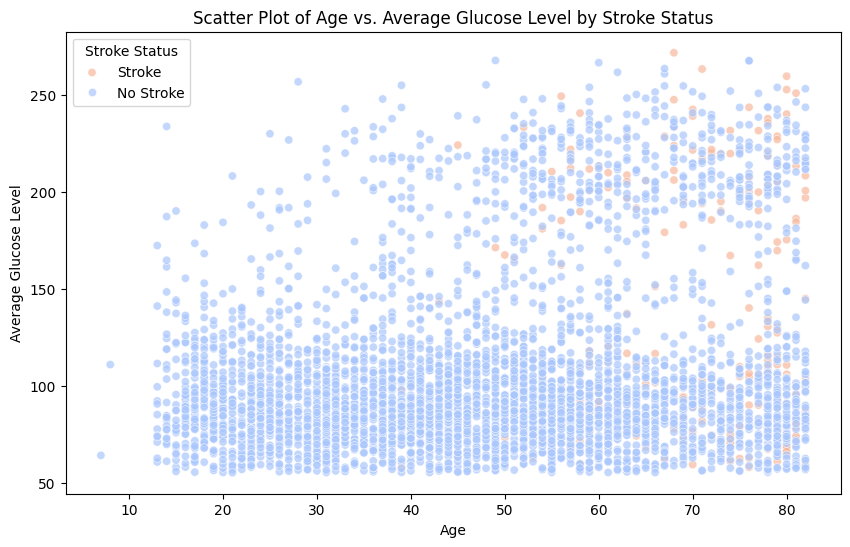

In [19]:
# Scatter plot using fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(10, 6))

# Scatterplot using seaborn
sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke', palette='coolwarm', alpha=0.7, ax=ax)

# Title and labels
ax.set_title('Scatter Plot of Age vs. Average Glucose Level by Stroke Status')
ax.set_xlabel('Age')
ax.set_ylabel('Average Glucose Level')

# Customize legend
legend_labels = ['Stroke', 'No Stroke']
ax.legend(title='Stroke Status', labels=legend_labels)

# Display the plot
plt.show()


In [20]:
plot2_filename = 'scatterplot.png'
fig.savefig(path + plot2_filename, dpi=dpi)

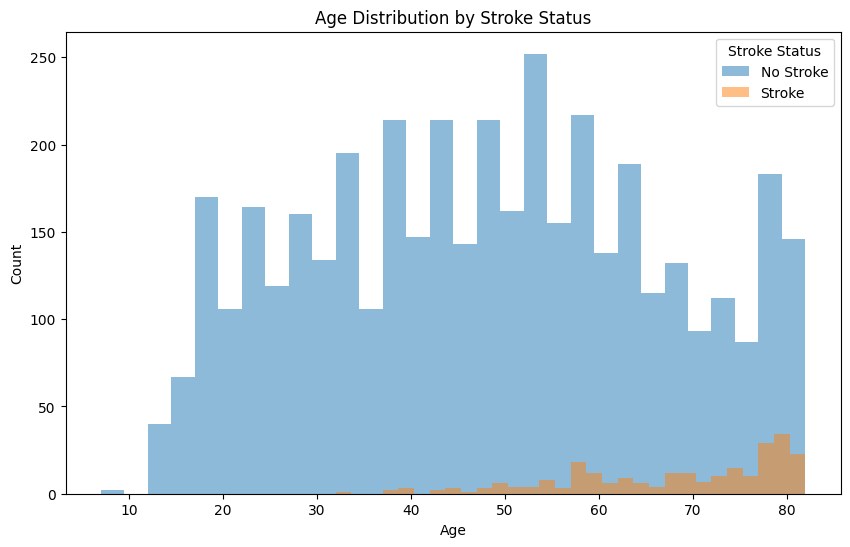

In [21]:
# Plotting Age Distribution by Stroke Status using histograms
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms for each stroke status
df[df['stroke'] == 0]['age'].plot(kind='hist', bins=30, alpha=0.5, ax=ax, label='No Stroke')
df[df['stroke'] == 1]['age'].plot(kind='hist', bins=30, alpha=0.5, ax=ax, label='Stroke')

# Title and labels
ax.set_title('Age Distribution by Stroke Status')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

# Legend
ax.legend(title='Stroke Status')

# Display the plot
plt.show()


In [22]:
plot3_filename = 'histogram.png'
fig.savefig(path + plot3_filename, dpi=dpi)

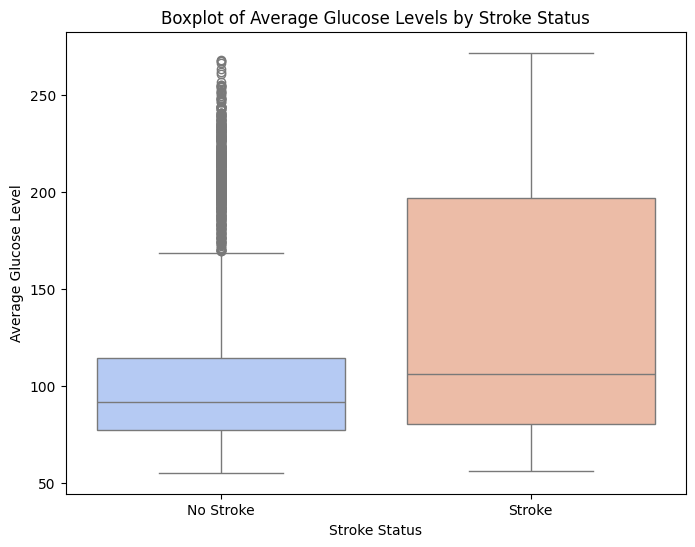

In [23]:
# Boxplot for Average Glucose Levels by Stroke Status
fig, ax = plt.subplots(figsize=(8, 6))

# Boxplot using seaborn
sns.boxplot(data=df, x='stroke', y='avg_glucose_level', palette='coolwarm', ax=ax)

# Title and labels
ax.set_title('Boxplot of Average Glucose Levels by Stroke Status')
ax.set_xlabel('Stroke Status')
ax.set_ylabel('Average Glucose Level')
ax.set_xticklabels(['No Stroke', 'Stroke'])

# Display the plot
plt.show()


In [24]:
plot4_filename = 'boxplot.png'
fig.savefig(path + plot4_filename, dpi=dpi)

Modeling and Analysis

In [25]:
# Separate features/target
X = df.drop('stroke', axis=1)
y = df['stroke']

In [26]:
# Split 80/20 stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [27]:
#Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
#Logistic Regression analysis
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
preds = lr_model.predict(X_test_scaled)

In [29]:
#Check model results
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
2791    0
3265    0
3297    0
3417    0
2070    0
       ..
1643    0
3898    0
3541    0
3745    0
3298    0
Name: stroke, Length: 885, dtype: int64
Predictions for test data set
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [30]:
#Evaluate the model
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_recall_curve,
    average_precision_score, roc_curve, precision_score, recall_score, f1_score,
    confusion_matrix
)

In [31]:
print('Accuracy score: ', accuracy_score(y_test, preds))
print('Precision score: ', precision_score(y_test, preds))
print('Recall score: ', recall_score(y_test, preds))
print('F1 score: ', f1_score(y_test, preds))
print('AUC Score: ', roc_auc_score(y_test, preds))

Accuracy score:  0.9446327683615819
Precision score:  0.5
Recall score:  0.02040816326530612
F1 score:  0.0392156862745098
AUC Score:  0.5096059955082511


In [43]:
from sklearn.model_selection import cross_val_score, cross_val_predict

lr_proba = cross_val_predict(lr_model, X_train_scaled, y_train, cv=3, method='predict_proba')
lr_scores = lr_proba[:, 1]

In [44]:
def ROC_Curve(title, y_train, scores, label=None):
    from sklearn.metrics import roc_curve

    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

AUC Score (Baseline Logistic Regression): 0.82 


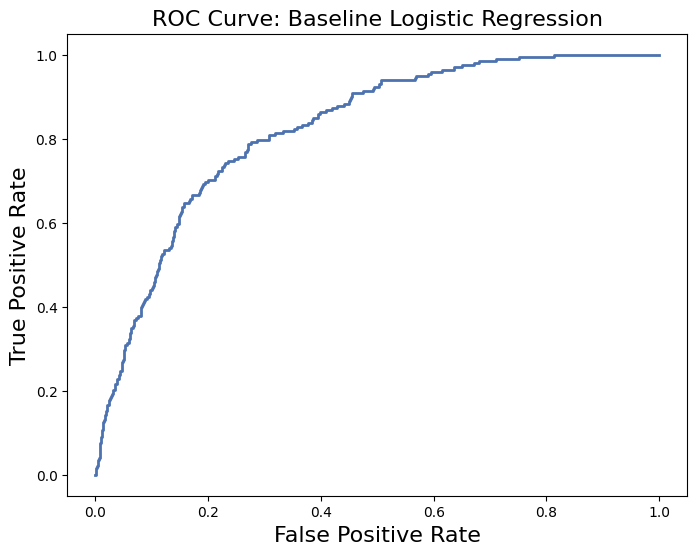

In [45]:
ROC_Curve('Baseline Logistic Regression',y_train,lr_scores)

In [46]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, preds)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       836
           1       0.50      0.02      0.04        49

    accuracy                           0.94       885
   macro avg       0.72      0.51      0.51       885
weighted avg       0.92      0.94      0.92       885



In [47]:
print(confusion_matrix(y_test,preds))

[[835   1]
 [ 48   1]]


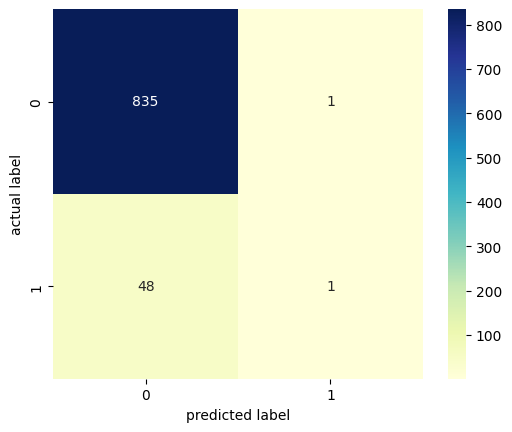

In [48]:
cm = confusion_matrix(y_test, preds)
target_labels = np.unique(y_test)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

The model performs well for predicting non-stroke cases (TN = 835). However, it fails to detect stroke cases effectively (FN = 48). This imbalance causes high accuracy but low recall, meaning the model is not sensitive enough to identify those most at risk. To improve the model’s ability to detect strokes, we can adjust the classification threshold, lowering it to 0.3.

In [49]:
#Get predicted probabilities for the positive class (stroke = 1)
proba = lr_model.predict_proba(X_test_scaled)[:, 1]

#Change the decision threshold to 0.3
threshold = 0.3
pred_03 = (proba >= threshold).astype(int)

#Evaluate metrics at threshold 0.3
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [50]:
print("Metrics at threshold 0.3:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_03))
print("Precision:", precision_score(y_test, pred_03))
print("Recall:", recall_score(y_test, pred_03))
print("F1 Score:", f1_score(y_test, pred_03))

Metrics at threshold 0.3:
Confusion Matrix:
[[826  10]
 [ 45   4]]
Precision: 0.2857142857142857
Recall: 0.08163265306122448
F1 Score: 0.12698412698412698


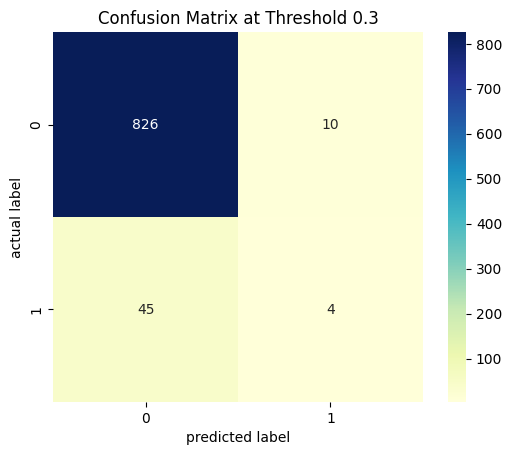

In [51]:
#Visualize the confusion matrix at threshold 0.3
cm_03 = confusion_matrix(y_test, pred_03)
target_labels = np.unique(y_test)

sns.heatmap(cm_03, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');
plt.title('Confusion Matrix at Threshold 0.3')
plt.show()

While adjusting the threshold slightly increased the number of True Positives (from 1 to 4), it also increased the number of False Positives (from 1 to 10). The recall is still very low, indicating the model is not effective at identifying stroke cases. The low precision suggests that when the model does predict a stroke, it's often incorrect.

This highlights the challenge of working with imbalanced datasets where the positive class (stroke) is rare. A simple logistic regression model with this threshold is not performing well for predicting stroke. Therefore, we will proceed to the next three models now, train Random Forest, SVM (RBF), and Gradient Boosting with the same preprocessing; then evaluate with ROC-AUC + PR-AUC.

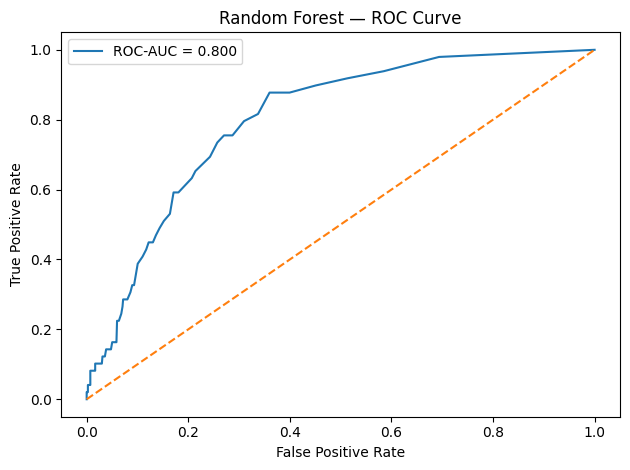

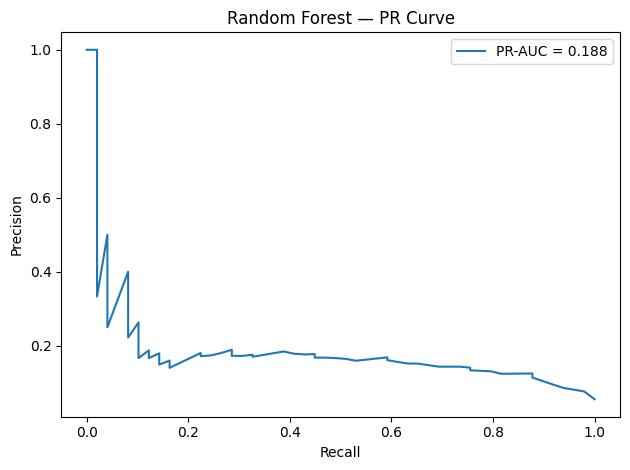

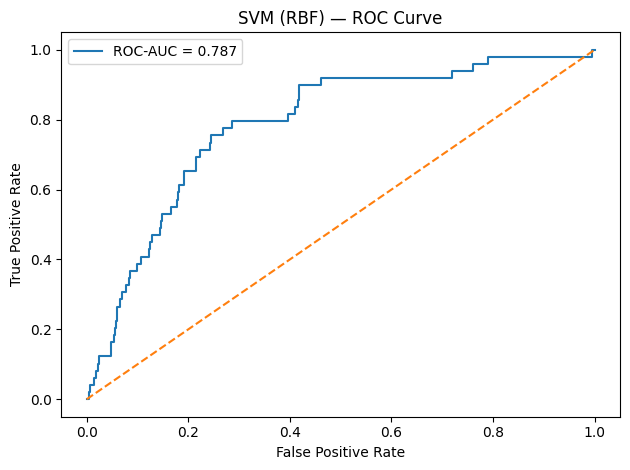

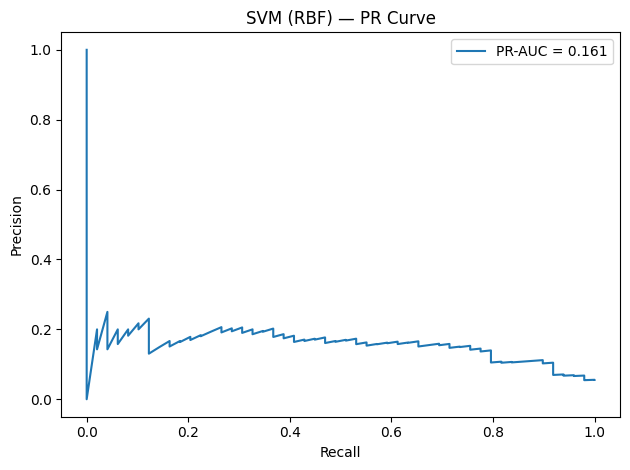

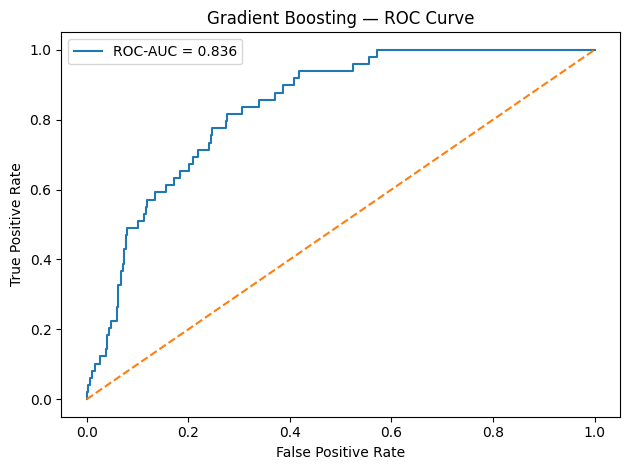

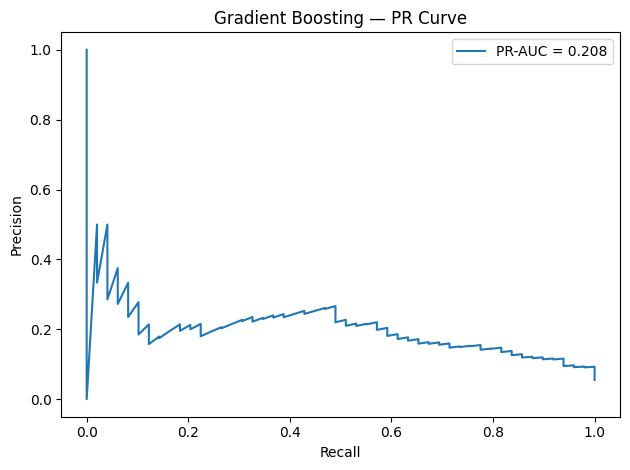

In [55]:
# Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"),
    "SVM (RBF)": SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = []

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    proba = model.predict_proba(X_test_scaled)[:, 1]

    roc_auc = roc_auc_score(y_test, proba)
    pr_auc = average_precision_score(y_test, proba)
    results.append({"Model": model_name, "ROC-AUC": roc_auc, "PR-AUC": pr_auc})

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} — ROC Curve")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # PR curve
    precision, recall, _ = precision_recall_curve(y_test, proba)
    plt.figure()
    plt.plot(recall, precision, label=f"PR-AUC = {pr_auc:.3f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{model_name} — PR Curve")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [53]:
    roc_auc = roc_auc_score(y_test, proba)
    pr_auc = average_precision_score(y_test, proba)
    results.append({"Model": model_name, "ROC-AUC": roc_auc, "PR-AUC": pr_auc})

In [56]:
import pandas as pd

results_df = pd.DataFrame(results)
display(results_df)

,Model,ROC-AUC,PR-AUC
0,Random Forest,0.800349,0.187879
1,SVM (RBF),0.786862,0.161126
2,Gradient Boosting,0.835514,0.207602


While all three models show improvement over the initial logistic regression model (which had a very low recall and F1 score), the Gradient Boosting model achieved the best scores on both ROC-AUC and PR-AUC, suggesting it is the most effective among these three models for predicting stroke risk in this dataset.

Possible Next Step: Generating a feature importance visualization for the Gradient Boosting model will help explain why the model makes certain predictions.